# 02 — Multiclass Classification (PyCaret, GPU)
**Dataset:** UCI Wine (3 classes)  
**Goal:** Predict wine class.  
**GPU:** `use_gpu=True` for GPU-capable models.

In [2]:
# Install latest stable PyCaret 3.x and common GPU-capable libs
!pip -q install --upgrade pycaret xgboost catboost lightgbm plotly gradio



zsh:1: command not found: pip


In [3]:
import sys, sklearn, pycaret, platform
print("Python:", sys.version)
print("Platform:", platform.platform())
print("scikit-learn:", sklearn.__version__)
print("pycaret:", pycaret.__version__)

# Check GPU
try:
    import subprocess, shutil
    if shutil.which("nvidia-smi"):
        print("\nGPU detected:")
        print(subprocess.check_output(["nvidia-smi"], text=True))
    else:
        print("\nNo NVIDIA GPU detected in this runtime. (Colab: Runtime -> Change runtime type -> GPU)")
except Exception as e:
    print("GPU check error:", e)

Python: 3.11.11 (main, Feb  5 2025, 19:11:07) [Clang 19.1.6 ]
Platform: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.35
scikit-learn: 1.4.2
pycaret: 3.3.2

GPU detected:
Sun Nov  2 15:36:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.65.05              Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  |   00000000:01:00.0  On |                  N/A |
|  0%   39C    P8             11W /  200W |     9

In [4]:
import pandas as pd
cols = ["target","Alcohol","Malic_Acid","Ash","Alcalinity_of_Ash","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity","Hue","OD280/OD315","Proline"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None, names=cols)

In [5]:
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all').T.head(20))
print("\nNA counts:")
print(df.isna().sum())

Shape: (178, 14)


,target,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,count,mean,std,min,25%,50%,75%,max
target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58



NA counts:
target                  0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(178, 14)"
5,Transformed data shape,"(178, 14)"
6,Transformed train set shape,"(124, 14)"
7,Transformed test set shape,"(54, 14)"
8,Numeric features,13
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9839,0.0000,0.9839,0.9853,0.9840,0.9757,0.9763,0.0167
lda,Linear Discriminant Analysis,0.9839,0.0000,0.9839,0.9853,0.9840,0.9757,0.9763,0.0167
lr,Logistic Regression,0.9837,0.0000,0.9837,0.9851,0.9838,0.9754,0.9760,0.0233
et,Extra Trees Classifier,0.9837,1.0000,0.9837,0.9850,0.9838,0.9754,0.9759,0.1400
svm,SVM - Linear Kernel,0.9677,0.0000,0.9677,0.9695,0.9677,0.9509,0.9518,0.0367
rf,Random Forest Classifier,0.9677,0.9993,0.9677,0.9700,0.9675,0.9510,0.9524,0.1767
lightgbm,Light Gradient Boosting Machine,0.9518,0.9972,0.9518,0.9552,0.9521,0.9268,0.9282,0.0800
knn,K Neighbors Classifier,0.9514,0.9916,0.9514,0.9533,0.9510,0.9265,0.9279,0.0600
nb,Naive Bayes,0.9514,0.9977,0.9514,0.9551,0.9513,0.9266,0.9285,0.0167
qda,Quadratic Discriminant Analysis,0.9357,0.0000,0.9357,0.9432,0.9361,0.9012,0.9049,0.0200


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.0000,0.9762,0.9782,0.9763,0.9639,0.9648
1,0.9756,0.0000,0.9756,0.9776,0.9757,0.9632,0.9640
2,0.9756,0.0000,0.9756,0.9776,0.9758,0.9630,0.9639
Mean,0.9758,0.0000,0.9758,0.9778,0.9760,0.9634,0.9642
Std,0.0003,0.0000,0.0003,0.0003,0.0003,0.0004,0.0004


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


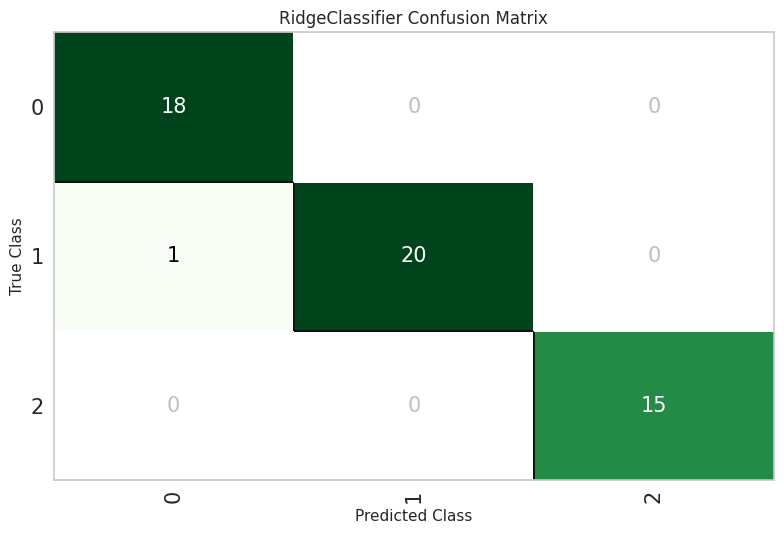

In [9]:
from pycaret.classification import *
s = setup(df, target='target', session_id=42, normalize=True, use_gpu=True, fold=3)
best = compare_models()
tuned = tune_model(best, optimize='Accuracy')
plot_model(tuned, plot='confusion_matrix')
final = finalize_model(tuned)
# save_path = save_model(final, f"{ART_DIR}/multiclass_wine_model")
# print("Saved:", save_path)